In [ ]:
from google.colab import files
upload=files.upload()

Saving data_raw_bankstats_B2.1.xls to data_raw_bankstats_B2.1.xls
Saving data_raw_ons_flow_of_funds.xls to data_raw_ons_flow_of_funds.xls
Saving data_raw_sonia_daily.csv to data_raw_sonia_daily.csv


In [ ]:
#setting up my environment
!pip install findspark pyspark
import findspark
findspark.init()

from pyspark.sql import SparkSession

# Initialize SparkSession if it's not already initialized
if 'spark' not in locals() or spark.getActiveSession() is None:
    spark = SparkSession.builder\
        .appName("Colab Financial Stability")\
        .getOrCreate()

spark.sql("CREATE DATABASE IF NOT EXISTS financial_stability")

spark.sql("USE financial_stability")

DataFrame[]

In [ ]:
#Loading datasets into  Python
import pandas as pd

#SONIA data
sonia_pdf = pd.read_csv('data_raw_sonia_daily.csv')

sonia_pdf.columns = sonia_pdf.columns.str.strip()
sonia_pdf.columns = sonia_pdf.columns.str.replace(' ', '_')
sonia_pdf.columns = sonia_pdf.columns.str.lower()

# Converting to Spark
sonia_sdf = spark.createDataFrame(sonia_pdf)
sonia_sdf.write.mode('overwrite').saveAsTable('financial_stability.sonia_raw')

#ONS flow of funds data
df_ons = pd.read_excel('data_raw_ons_flow_of_funds.xls', engine='xlrd')

# Converting to Spark
ons_sdf = spark.createDataFrame(df_ons)
ons_sdf.write.mode('overwrite').saveAsTable('financial_stability.ons_raw')

#Bnakstats data
df_bankstats = pd.read_excel('data_raw_bankstats_B2.1.xls', engine='xlrd', header=9)

df_bankstats.columns = df_bankstats.columns.str.strip()
df_bankstats.columns = df_bankstats.columns.str.replace(' ', '_')
df_bankstats.columns = df_bankstats.columns.str.lower()

# Drop the first row of the pandas DataFrame as it contains metadata/non-numeric values
df_bankstats = df_bankstats.iloc[1:]

# Convert the 'unnamed:_1' column to string type to avoid schema inference issues with mixed types
df_bankstats['unnamed:_1'] = df_bankstats['unnamed:_1'].astype(str)

# List of columns that are expected to be numeric and might cause type inference issues
numeric_cols_to_convert = ['unnamed:_0', 'unnamed:_2', 'unnamed:_3', 'unnamed:_4', 'currency',
                           'unnamed:_6', 'unnamed:_7', 'unnamed:_8', 'currency.1', 'unnamed:_10',
                           'unnamed:_11', 'unnamed:_12', 'currency.2', 'unnamed:_14', 'unnamed:_15',
                           'unnamed:_16', 'currency.3', 'unnamed:_18', 'unnamed:_19', 'unnamed:_20']

# Iteratively convert relevant columns to numeric, coercing errors to NaN, then explicitly to float
for col_name in numeric_cols_to_convert:
    if col_name in df_bankstats.columns:
        df_bankstats[col_name] = pd.to_numeric(df_bankstats[col_name], errors='coerce').astype(float)

# Converting to Spark
bankstats_sdf = spark.createDataFrame(df_bankstats)
bankstats_sdf.printSchema()
bankstats_sdf.write.mode('overwrite').saveAsTable('financial_stability.bankstats_raw')

# Display the head of the pandas DataFrame to inspect the columns
display(df_bankstats.head(10))

root
 |-- unnamed:_0: double (nullable = true)
 |-- unnamed:_1: string (nullable = true)
 |-- unnamed:_2: double (nullable = true)
 |-- unnamed:_3: double (nullable = true)
 |-- unnamed:_4: double (nullable = true)
 |-- currency: double (nullable = true)
 |-- unnamed:_6: double (nullable = true)
 |-- unnamed:_7: double (nullable = true)
 |-- unnamed:_8: double (nullable = true)
 |-- currency.1: double (nullable = true)
 |-- unnamed:_10: double (nullable = true)
 |-- unnamed:_11: double (nullable = true)
 |-- unnamed:_12: double (nullable = true)
 |-- currency.2: double (nullable = true)
 |-- unnamed:_14: double (nullable = true)
 |-- unnamed:_15: double (nullable = true)
 |-- unnamed:_16: double (nullable = true)
 |-- currency.3: double (nullable = true)
 |-- unnamed:_18: double (nullable = true)
 |-- unnamed:_19: double (nullable = true)
 |-- unnamed:_20: double (nullable = true)



,unnamed:_0,unnamed:_1,unnamed:_2,unnamed:_3,unnamed:_4,currency,unnamed:_6,unnamed:_7,unnamed:_8,currency.1,...,unnamed:_11,unnamed:_12,currency.2,unnamed:_14,unnamed:_15,unnamed:_16,currency.3,unnamed:_18,unnamed:_19,unnamed:_20
1,NaN,2023-11-01 00:00:00,NaN,2970371.0,NaN,683919.0,NaN,46389.0,NaN,11421.0,...,538919.0,NaN,3492170.0,NaN,243422.0,NaN,419088.0,NaN,8431108.0,NaN
2,NaN,2023-12-01 00:00:00,NaN,2984095.0,NaN,716972.0,NaN,45374.0,NaN,11710.0,...,558095.0,NaN,3523105.0,NaN,254120.0,NaN,433309.0,NaN,8564115.0,NaN
3,NaN,2024-01-01 00:00:00,NaN,2981187.0,NaN,692649.0,NaN,43255.0,NaN,10763.0,...,534646.0,NaN,3532938.0,NaN,282384.0,NaN,393293.0,NaN,8461501.0,NaN
4,NaN,2024-02-01 00:00:00,NaN,2994918.0,NaN,689142.0,NaN,41997.0,NaN,10647.0,...,532937.0,NaN,3611946.0,NaN,282774.0,NaN,375325.0,NaN,8563546.0,NaN
5,NaN,2024-03-01 00:00:00,NaN,3020891.0,NaN,726108.0,NaN,41497.0,NaN,10967.0,...,537474.0,NaN,3603338.0,NaN,273909.0,NaN,403814.0,NaN,8656024.0,NaN
6,NaN,2024-04-01 00:00:00,NaN,3026392.0,NaN,712437.0,NaN,38088.0,NaN,9676.0,...,541055.0,NaN,3632531.0,NaN,369486.0,NaN,294441.0,NaN,8630993.0,NaN
7,NaN,2024-05-01 00:00:00,NaN,3025012.0,NaN,701279.0,NaN,36974.0,NaN,9248.0,...,541765.0,NaN,3603703.0,NaN,375351.0,NaN,309278.0,NaN,8622138.0,NaN
8,NaN,2024-06-01 00:00:00,NaN,3040429.0,NaN,683734.0,NaN,39957.0,NaN,9416.0,...,553095.0,NaN,3602703.0,NaN,372984.0,NaN,313327.0,NaN,8628756.0,NaN
9,NaN,2024-07-01 00:00:00,NaN,3054801.0,NaN,677364.0,NaN,39495.0,NaN,10546.0,...,547479.0,NaN,3674112.0,NaN,406259.0,NaN,282427.0,NaN,8701416.0,NaN
10,NaN,2024-08-01 00:00:00,NaN,3052423.0,NaN,665227.0,NaN,39420.0,NaN,10650.0,...,559989.0,NaN,3603288.0,NaN,381054.0,NaN,307111.0,NaN,8615498.0,NaN


In [ ]:
#Cleaning SONIA dataset
from pyspark.sql.functions import col

# Step 1: Rename the column using the correct cleaned column name
sonia_temp = sonia_sdf.withColumnRenamed(
    "daily_sterling_overnight_index_average_(sonia)_rate______________[a]_[b]_____________iudsoia",
    "sonia_rate"
)

# Step 2: Cast the newly renamed column and drop rows with nulls
sonia_clean = (
    sonia_temp
    .withColumn("sonia_rate", col("sonia_rate").cast("double"))
    .dropna()
)

sonia_clean.write.mode('overwrite').saveAsTable("financial_stability.sonia_clean")

In [ ]:
#Cleaning Bankstats dataset + creating liquidity ratio
from pyspark.sql.functions import col

# First, perform the renames to ensure the new column names are resolved
bankstats_temp = bankstats_sdf \
    .withColumnRenamed("currency", "currency_value") \
    .withColumnRenamed("currency.1", "currency_value_1") \
    .withColumnRenamed("currency.2", "currency_2") \
    .withColumnRenamed("currency.3", "currency_3")

# Then, calculate the liquidity ratio using the newly named columns
# Apply dropna more selectively to preserve data, focusing on essential columns
bankstats_clean = (
    bankstats_temp
    .withColumn("liquidity_ratio", col("`unnamed:_3`").cast("double") / col("currency_value").cast("double") + col("currency_value_1").cast("double"))
    .dropna(subset=["unnamed:_1", "unnamed:_3", "currency_value", "currency_value_1"])
)

bankstats_clean.write.mode('overwrite').saveAsTable("financial_stability.bankstats_clean")

In [ ]:
#Cleaning ONS Flow of Funds
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DoubleType

# Define a UDF to safely cast to double, returning None for malformed inputs
def safe_double_cast(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return None

safe_double_cast_udf = udf(safe_double_cast, DoubleType())

# Define the original long column name
original_col_name = "FC except MFI & ICPF (S124/5/6/7): Financial derivatives and employee stock options (AF.7): Level: Liability: CP £m: NSA"

ons_clean = (
    ons_sdf
    .withColumnRenamed(original_col_name, "value") # Rename the long column to 'value'
    .withColumn("value", safe_double_cast_udf(col("value"))) # Use the custom UDF
    .dropna() # Drop rows where casting failed (now null) or other nulls
)

ons_clean.write.mode('overwrite').saveAsTable("financial_stability.ons_clean")

In [ ]:
#SONIA Volatility (7-day rolling)
from pyspark.sql import Window
import pyspark.sql.functions as F

w = Window.orderBy("Date").rowsBetween(-7, 0)

sonia_metrics = sonia_clean.withColumn(
  "sonia_volatility",
  F.stddev("sonia_rate").over(w)
)

sonia_metrics.write.mode('overwrite').saveAsTable("financial_stability.sonia_metrics")

In [ ]:
#Compute yearly system flows
from pyspark.sql.functions import substring, col

flows_pdf = (
  ons_clean.withColumn("Year", substring(col("Title"), 1, 4).cast("int"))
  .groupBy("Year")
  .agg(F.sum("value").alias("system_flows"))
  .toPandas()
)

flows_pdf.head()

,Year,system_flows
0,1990,0.0
1,2003,379.0
2,2007,1955525.0
3,2018,7529435.0
4,2015,9942518.0


In [ ]:
#SONIA forecasting
from prophet import Prophet

sonia_pdf = sonia_clean.select("Date", "sonia_rate").toPandas()
sonia_pdf.columns = ["ds", "y"]

model_sonia = Prophet()
model_sonia.fit(sonia_pdf)

future_sonia = model_sonia.make_future_dataframe(periods=1825)
forecast_sonia = model_sonia.predict(future_sonia)

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1136: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:290: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Liquidity Ratio forecasting
from pyspark.sql.functions import col, to_timestamp
from prophet import Prophet
import pandas as pd

# Convert 'unnamed:_1' to timestamp directly for 'ds'
# Prophet expects 'ds' to be a datetime-like column
liq_pdf = bankstats_clean.withColumn(
    "ds", to_timestamp(col("unnamed:_1"), "yyyy-MM-dd HH:mm:ss")
).select(
    col("ds"),
    col("liquidity_ratio").alias("y")
).dropna(subset=["ds", "y"]).toPandas()

# Ensure 'ds' column is datetime type in Pandas DataFrame, necessary for Prophet to interpret frequency
liq_pdf['ds'] = pd.to_datetime(liq_pdf['ds'])

model_liq = Prophet()
model_liq.fit(liq_pdf)

# Generate future dates for quarterly forecast (e.g., 40 periods = 10 years of quarters)
future_liq = model_liq.make_future_dataframe(periods=40, freq='Q')
forecast_liq = model_liq.predict(future_liq)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(


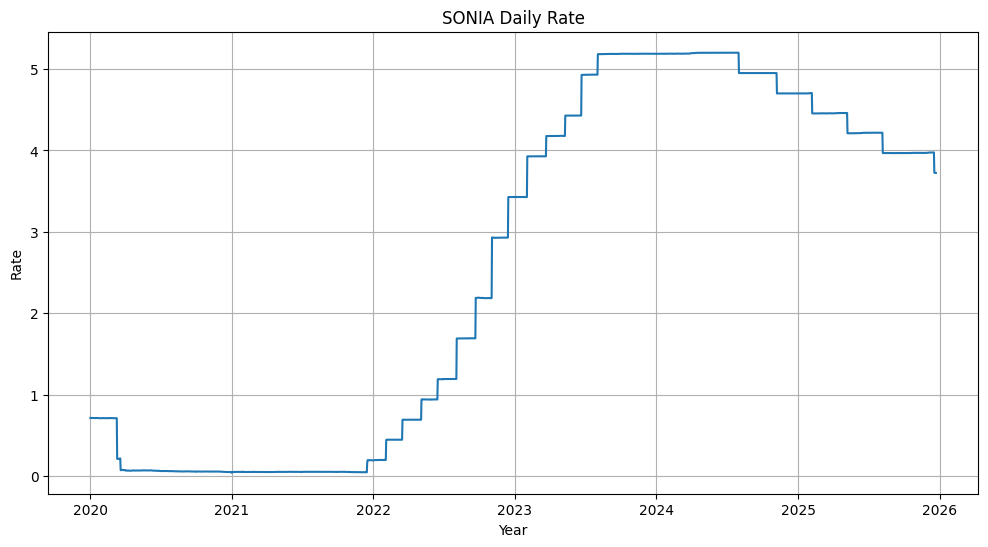

In [ ]:
#SONIA time Series graph visualisation
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Ensure 'ds' column is in datetime format for proper plotting
sonia_pdf['ds'] = pd.to_datetime(sonia_pdf['ds'])

plt.figure(figsize=(12,6))
plt.plot(sonia_pdf['ds'], sonia_pdf['y'])
plt.title("SONIA Daily Rate")
plt.xlabel("Year")
plt.ylabel("Rate")

# Set major ticks to every  year
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
# Format the dates as 'YYYY'
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.grid(True)
plt.show()

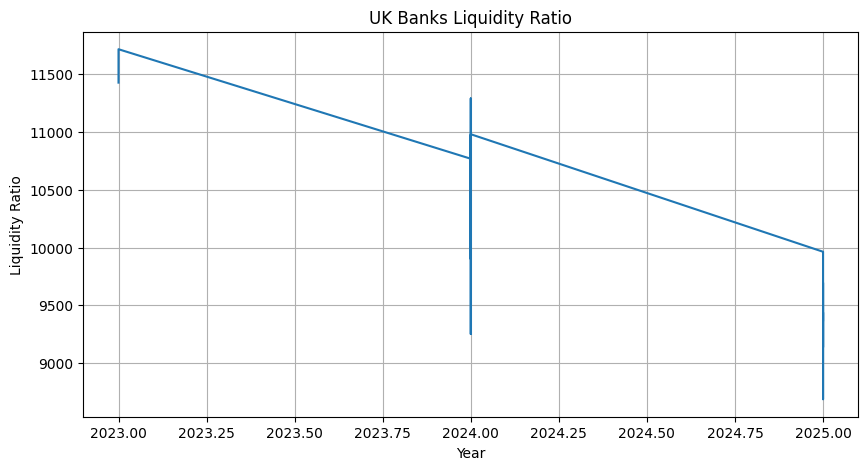

In [ ]:
plt.figure(figsize=(10,5))


plt.plot(filtered_liq_pdf['ds'], filtered_liq_pdf['y'])

plt.title("UK Banks Liquidity Ratio")

plt.xlabel("Year")
plt.ylabel("Liquidity Ratio")

plt.grid()
plt.show()

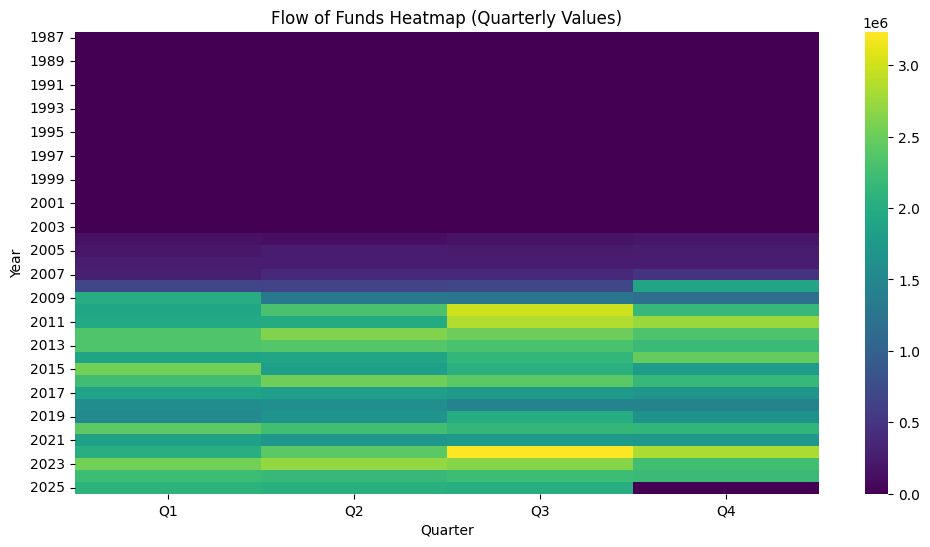

In [ ]:
#Create a Flow of funds heatmap

import seaborn as sns
import pandas as pd

ons_pdf = ons_clean.toPandas()

# Extract Year and Quarter from the 'Title' column using regex
extracted_data = ons_pdf['Title'].str.extract(r'(\d{4})\s*(Q[1-4])?')
ons_pdf['Year'] = extracted_data[0].astype(int)
ons_pdf['Quarter'] = extracted_data[1]

# Filter out rows that do not have quarter information for a clear quarterly heatmap
ons_pdf_quarterly = ons_pdf.dropna(subset=['Quarter'])

# Pivot the table to get 'Year' as index, 'Quarter' as columns, and 'value' as values
pivot = ons_pdf_quarterly.pivot_table(values='value', index='Year', columns='Quarter', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="viridis")
plt.title("Flow of Funds Heatmap (Quarterly Values)")
plt.show()

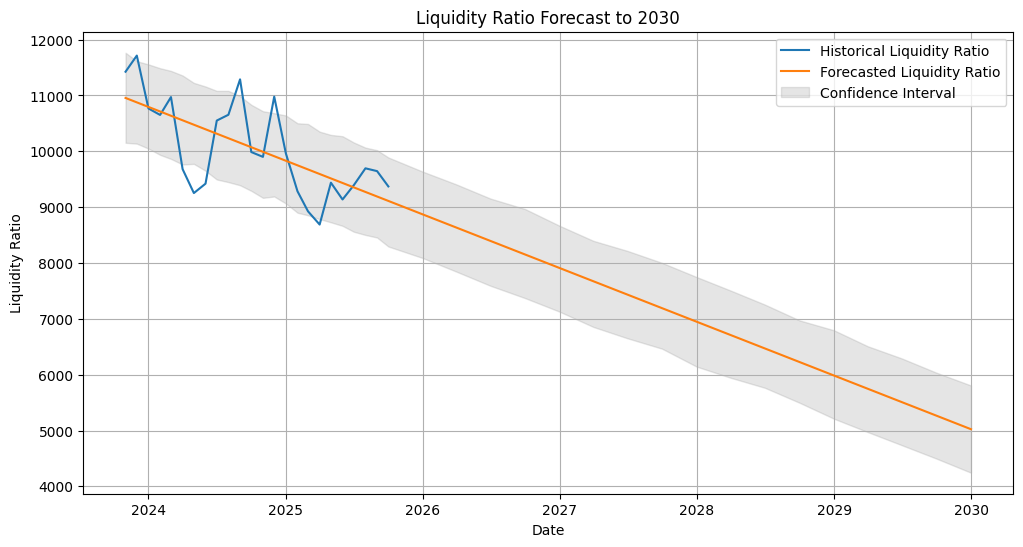

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))
plt.plot(liq_pdf['ds'], liq_pdf['y'], label='Historical Liquidity Ratio')

# Filter the forecast data to stop at the year 2030
forecast_liq_filtered = forecast_liq[forecast_liq['ds'] <= pd.Timestamp('2029-12-31')]

plt.plot(forecast_liq_filtered['ds'], forecast_liq_filtered['yhat'], label='Forecasted Liquidity Ratio')
plt.fill_between(
    forecast_liq_filtered['ds'],
    forecast_liq_filtered['yhat_lower'],
    forecast_liq_filtered['yhat_upper'],
    color='gray', alpha=0.2, label='Confidence Interval'
)
plt.title('Liquidity Ratio Forecast to 2030')
plt.xlabel('Date')
plt.ylabel('Liquidity Ratio')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from google.colab import files

# Convert sonia_clean to Pandas and save as CSV
sonia_clean_pdf = sonia_clean.toPandas()
sonia_clean_pdf.to_csv('sonia_clean.csv', index=False)
print("Downloading sonia_clean.csv...")
files.download('sonia_clean.csv')

# Convert bankstats_clean to Pandas and save as CSV
bankstats_clean_pdf = bankstats_clean.toPandas()
bankstats_clean_pdf.to_csv('bankstats_clean.csv', index=False)
print("Downloading bankstats_clean.csv...")
files.download('bankstats_clean.csv')

# Convert ons_clean to Pandas and save as CSV
ons_clean_pdf = ons_clean.toPandas()
ons_clean_pdf.to_csv('ons_clean.csv', index=False)
print("Downloading ons_clean.csv...")
files.download('ons_clean.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>